In [1]:
%run Function_set_dic.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

#from dwave.system.samplers import DWaveSampler
#from dwave.system.composites import EmbeddingComposite
from dwave.cloud import Client
client = Client.from_config(token='DEV-a3f87cd2fb51d10601c4e8bd16114d92614fc291')     
print(client.get_solvers() )

import networkx as nx
import numpy as np
#import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

[StructuredSolver(id='Advantage_system4.1'), StructuredSolver(id='DW_2000Q_6'), StructuredSolver(id='Advantage_system1.1')]


In [3]:
network,pos = Make_Question(4,3,Density = 0.85, option = "1-norm", distance = 2)

print(network)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]


{(1, 0): '0', (2, 0): '1', (3, 0): '2', (4, 0): '3', (5, 0): '4', (6, 0): '5', (7, 0): '6', (8, 0): '7', (9, 0): '8', (10, 0): '9', (1, 2): '10', (1, 5): '11', (2, 6): '13', (3, 4): '14', (3, 7): '15', (4, 5): '17', (4, 8): '18', (5, 6): '21', (5, 9): '22', (6, 10): '25', (7, 8): '27', (8, 9): '30', (9, 10): '33', (2, 1): '12', (4, 3): '16', (5, 1): '19', (5, 4): '20', (6, 2): '23', (6, 5): '24', (7, 3): '26', (8, 4): '28', (8, 7): '29', (9, 5): '31', (9, 8): '32', (10, 6): '34', (10, 9): '35'}


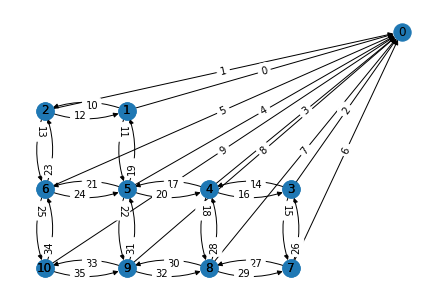

In [4]:
G, compelete_label, graph = complete_Graph(network,pos)
print(compelete_label)

In [5]:
compelete_label

{(1, 0): '0',
 (2, 0): '1',
 (3, 0): '2',
 (4, 0): '3',
 (5, 0): '4',
 (6, 0): '5',
 (7, 0): '6',
 (8, 0): '7',
 (9, 0): '8',
 (10, 0): '9',
 (1, 2): '10',
 (1, 5): '11',
 (2, 6): '13',
 (3, 4): '14',
 (3, 7): '15',
 (4, 5): '17',
 (4, 8): '18',
 (5, 6): '21',
 (5, 9): '22',
 (6, 10): '25',
 (7, 8): '27',
 (8, 9): '30',
 (9, 10): '33',
 (2, 1): '12',
 (4, 3): '16',
 (5, 1): '19',
 (5, 4): '20',
 (6, 2): '23',
 (6, 5): '24',
 (7, 3): '26',
 (8, 4): '28',
 (8, 7): '29',
 (9, 5): '31',
 (9, 8): '32',
 (10, 6): '34',
 (10, 9): '35'}

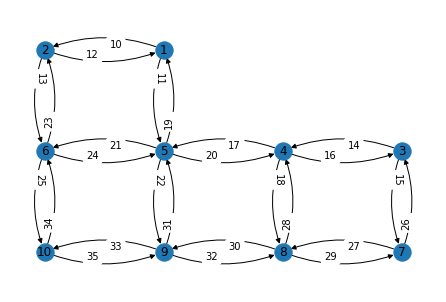

In [6]:
G_prime, sub_edge_label, sub_graph = sub_Graph (network,pos)

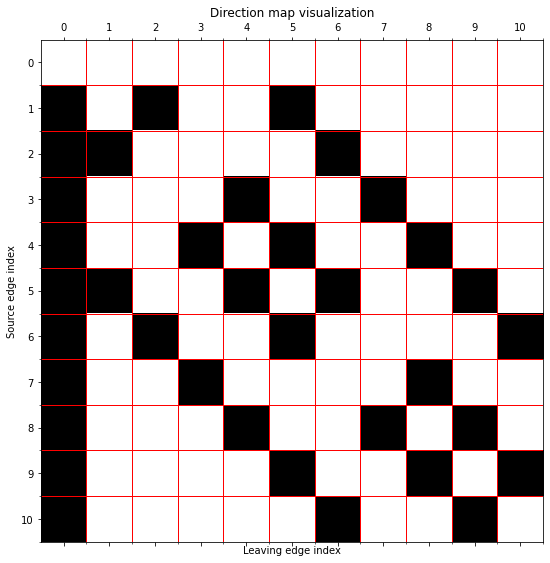

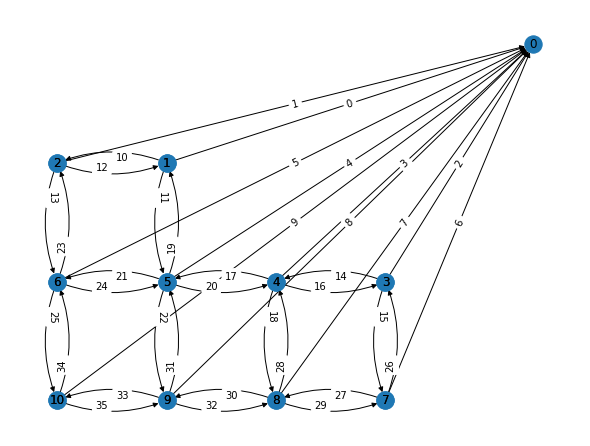

In [7]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(network,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, network.shape[0], step=1))
ax.set_yticks(np.arange(0, network.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, network.shape[0], step=1))
ax.set_yticklabels(np.arange(0, network.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
_, _, _ = complete_Graph(network,pos)

In [8]:
%run Function_set_dic.ipynb
# How many panel ---> Max electricity level wire could reach 
Q = len(pos)-1

N_tree = capacity_subtree_limit_generator(pos,Q)

0 9


In [9]:
%run Function_set_dic.ipynb

print(Q)

# How many edges
edge_number = len(compelete_label)


# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
# test case : #basic_cost = np.arange(edge_number)

basic_cost = np.ones(edge_number) * 2


# flow cost (p)
flow_cost = np.ones(edge_number) 
p = 1


# make dictionary
edge_dictionary, Total = make_dictionary(edge_number, Q, N_tree)

# initialize a QUBO matrix needed
QUBO_matrix_initial = np.zeros((Total, Total))


print('N_tree  = ', N_tree )
#print('edge_dictionary  = ', edge_dictionary )

10
N_tree  =  [1 2 3 4 5 6 7 8 9]


In [10]:
s = [dimod.Binary(f's_{j}') for j in range(len(N_tree))]
x = [[dimod.Binary(f'x_{m}_{n}') for n in range(1,Q+1)] for m in range(edge_number)]

#print(s)
print(len(x))
print(x)

36
[[BinaryQuadraticModel({'x_0_1': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_0_2': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_0_3': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_0_4': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_0_5': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_0_6': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_0_7': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_0_8': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_0_9': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_0_10': 1.0}, {}, 0.0, 'BINARY')], [BinaryQuadraticModel({'x_1_1': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_1_2': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_1_3': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_1_4': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_1_5': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_1_6': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'x_1_7': 1.0}, {}, 0.0, 'BINARY'), BinaryQuadraticModel({'

In [11]:
#x = [[dimod.Binary(f'x_{m}_{n}') for m in range(edge_number)] for n in range(1,Q+1)]
cqm = dimod.ConstrainedQuadraticModel()
#print(edge_dictionary)

In [12]:
c_e = (np.tile(np.vstack(basic_cost),(1,Q+1))).flatten()
        
level_coeff = (np.tile(np.arange(1,Q + 1),(edge_number,1))).flatten()

#print(np.shape(c_e))

#print(level_coeff)
        
cqm.set_objective(sum(s) * (sum(basic_cost[i] * sum(x[i][j] for j in range(Q)) for i in range(edge_number)) + p * sum(c_e[m] * sum(n * x[m][n] for n in range(Q)) for m in range(edge_number)) ) )

In [13]:
def constraint_1(Final_map, Q, edge_dictionary, compelete_label, vertex):
    
    index = np.hstack(np.asarray(np.where(Final_map[vertex,:])))             
            
    index_matched = []
    
    for vertex_selected in index:
            
        #print(int(compelete_label[(vertex, vertex_selected)]))
        
            index_matched.append( int(compelete_label[(vertex, vertex_selected)]) )
    
    return index_matched


In [14]:
## C 1

for vertex in range(1, Q + 1):
    
    index = constraint_1(network, Q, edge_dictionary, compelete_label, vertex)
    
    #print(index)
    
    cqm.add_constraint( sum( sum(x[i][j] for j in range(Q)) for i in index) == 1, label=f'constraint_1_vertex_{vertex}')

In [15]:
def constraint_2(Final_map, Q, edge_dictionary, compelete_label, vertex):
    
    index_out = np.hstack(np.asarray(np.where(Final_map[vertex,:])))             
            
    index_out_matched = []
    
    for vertex_selected in index_out:
            
        index_out_matched.append( int(compelete_label[(vertex, vertex_selected)])  )
    
    index_in = np.hstack(np.asarray(np.where(Final_map[:,vertex])))
    
    index_in_matched = []
    
    for vertex_selected in index_in:
        index_in_matched.append( int(compelete_label[(vertex_selected, vertex )])  )

    
    return index_out_matched, index_in_matched

In [16]:
## C 2
for vertex in range(1, Q + 1):
    
    index_out, index_in = constraint_2(network, Q, edge_dictionary, compelete_label, vertex)
    
    print(index_out, index_in, level_coeff[index_in])
    
    cqm.add_constraint( sum(sum( (j+1) * x[i][j] for j in range(Q)) for i in index_out) - sum( sum( (n+1) * x[m][n] for n in range(Q)) for m in index_in)  == 1, label=f'constraint_2_vertex_{vertex}')
    
#a = getattr(cqm,'_constraints')
#print(getattr(cqm,'_constraints'))
#print(a['constraint_2_vertex_1'])

[0, 10, 11] [12, 19] [ 3 10]
[1, 12, 13] [10, 23] [1 4]
[2, 14, 15] [16, 26] [7 7]
[3, 16, 17, 18] [14, 20, 28] [5 1 9]
[4, 19, 20, 21, 22] [11, 17, 24, 31] [2 8 5 2]
[5, 23, 24, 25] [13, 21, 34] [4 2 5]
[6, 26, 27] [15, 29] [ 6 10]
[7, 28, 29, 30] [18, 27, 32] [9 8 3]
[8, 31, 32, 33] [22, 30, 35] [3 1 6]
[9, 34, 35] [25, 33] [6 4]


In [17]:
def constraint_4(Q, edge_dictionary, Total, N_k):
    
    index_option_matched = []
                 
    index_bus_matched = []
    
    #print(index_option_matched)
    
    for option_num, option in enumerate(N_k):
                 
        index_option_matched.append(edge_dictionary["x_tree_%d"%(option_num)])
                 

    for Bus_edge in range(Q):         

        for level in range(Q):
                    
            index_bus_matched.append(edge_dictionary['x_%d_%d'%(Bus_edge, level + 1)])
                   
    return index_option_matched, index_bus_matched 
                 

In [18]:
#C 4

#index_option, index_bus = constraint_4(Q, edge_dictionary, Total, N_tree)

cqm.add_constraint( sum(sum( x[m][n] for n in range(Q)) for m in range(Q)) - sum( coeff * s[i] for  i, coeff in enumerate(N_tree) ) == 0, label=f'constraint_4')

'constraint_4'

In [19]:
#
cqm.add_constraint( sum(s) == 1, label=f'constraint_5')

'constraint_5'

In [20]:
from dwave.system import LeapHybridCQMSampler
sampler = LeapHybridCQMSampler()    
print(sampler.solver.name)

hybrid_constrained_quadratic_model_version1


In [21]:
#print(cqm)
#print(cqm.__dict__)



In [22]:
#a = getattr(cqm,'_objective')
#print(getattr(cqm,'_objective'))

In [23]:
a = getattr(cqm,'_constraints')
#print(getattr(cqm,'_constraints'))
len(cqm.constraints)

22

In [24]:
for vertex in range(1,Q + 1):
    print(a[f'constraint_1_vertex_{vertex}'])

BinaryQuadraticModel({'x_0_1': 1.0, 'x_0_2': 1.0, 'x_0_3': 1.0, 'x_0_4': 1.0, 'x_0_5': 1.0, 'x_0_6': 1.0, 'x_0_7': 1.0, 'x_0_8': 1.0, 'x_0_9': 1.0, 'x_0_10': 1.0, 'x_10_1': 1.0, 'x_10_2': 1.0, 'x_10_3': 1.0, 'x_10_4': 1.0, 'x_10_5': 1.0, 'x_10_6': 1.0, 'x_10_7': 1.0, 'x_10_8': 1.0, 'x_10_9': 1.0, 'x_10_10': 1.0, 'x_11_1': 1.0, 'x_11_2': 1.0, 'x_11_3': 1.0, 'x_11_4': 1.0, 'x_11_5': 1.0, 'x_11_6': 1.0, 'x_11_7': 1.0, 'x_11_8': 1.0, 'x_11_9': 1.0, 'x_11_10': 1.0}, {}, 0.0, 'BINARY') == 1
BinaryQuadraticModel({'x_1_1': 1.0, 'x_1_2': 1.0, 'x_1_3': 1.0, 'x_1_4': 1.0, 'x_1_5': 1.0, 'x_1_6': 1.0, 'x_1_7': 1.0, 'x_1_8': 1.0, 'x_1_9': 1.0, 'x_1_10': 1.0, 'x_12_1': 1.0, 'x_12_2': 1.0, 'x_12_3': 1.0, 'x_12_4': 1.0, 'x_12_5': 1.0, 'x_12_6': 1.0, 'x_12_7': 1.0, 'x_12_8': 1.0, 'x_12_9': 1.0, 'x_12_10': 1.0, 'x_13_1': 1.0, 'x_13_2': 1.0, 'x_13_3': 1.0, 'x_13_4': 1.0, 'x_13_5': 1.0, 'x_13_6': 1.0, 'x_13_7': 1.0, 'x_13_8': 1.0, 'x_13_9': 1.0, 'x_13_10': 1.0}, {}, 0.0, 'BINARY') == 1
BinaryQuadraticModel

In [25]:
for vertex in range(1,Q + 1):
    print(a[f'constraint_2_vertex_{vertex}'])

BinaryQuadraticModel({'x_0_1': 1.0, 'x_0_2': 2.0, 'x_0_3': 3.0, 'x_0_4': 4.0, 'x_0_5': 5.0, 'x_0_6': 6.0, 'x_0_7': 7.0, 'x_0_8': 8.0, 'x_0_9': 9.0, 'x_0_10': 10.0, 'x_10_1': 1.0, 'x_10_2': 2.0, 'x_10_3': 3.0, 'x_10_4': 4.0, 'x_10_5': 5.0, 'x_10_6': 6.0, 'x_10_7': 7.0, 'x_10_8': 8.0, 'x_10_9': 9.0, 'x_10_10': 10.0, 'x_11_1': 1.0, 'x_11_2': 2.0, 'x_11_3': 3.0, 'x_11_4': 4.0, 'x_11_5': 5.0, 'x_11_6': 6.0, 'x_11_7': 7.0, 'x_11_8': 8.0, 'x_11_9': 9.0, 'x_11_10': 10.0, 'x_12_1': -1.0, 'x_12_2': -2.0, 'x_12_3': -3.0, 'x_12_4': -4.0, 'x_12_5': -5.0, 'x_12_6': -6.0, 'x_12_7': -7.0, 'x_12_8': -8.0, 'x_12_9': -9.0, 'x_12_10': -10.0, 'x_19_1': -1.0, 'x_19_2': -2.0, 'x_19_3': -3.0, 'x_19_4': -4.0, 'x_19_5': -5.0, 'x_19_6': -6.0, 'x_19_7': -7.0, 'x_19_8': -8.0, 'x_19_9': -9.0, 'x_19_10': -10.0}, {}, -0.0, 'BINARY') == 1
BinaryQuadraticModel({'x_1_1': 1.0, 'x_1_2': 2.0, 'x_1_3': 3.0, 'x_1_4': 4.0, 'x_1_5': 5.0, 'x_1_6': 6.0, 'x_1_7': 7.0, 'x_1_8': 8.0, 'x_1_9': 9.0, 'x_1_10': 10.0, 'x_12_1': 1.0, 'x_

In [26]:
print(a[f'constraint_4'])


BinaryQuadraticModel({'x_0_1': 1.0, 'x_0_2': 1.0, 'x_0_3': 1.0, 'x_0_4': 1.0, 'x_0_5': 1.0, 'x_0_6': 1.0, 'x_0_7': 1.0, 'x_0_8': 1.0, 'x_0_9': 1.0, 'x_0_10': 1.0, 'x_1_1': 1.0, 'x_1_2': 1.0, 'x_1_3': 1.0, 'x_1_4': 1.0, 'x_1_5': 1.0, 'x_1_6': 1.0, 'x_1_7': 1.0, 'x_1_8': 1.0, 'x_1_9': 1.0, 'x_1_10': 1.0, 'x_2_1': 1.0, 'x_2_2': 1.0, 'x_2_3': 1.0, 'x_2_4': 1.0, 'x_2_5': 1.0, 'x_2_6': 1.0, 'x_2_7': 1.0, 'x_2_8': 1.0, 'x_2_9': 1.0, 'x_2_10': 1.0, 'x_3_1': 1.0, 'x_3_2': 1.0, 'x_3_3': 1.0, 'x_3_4': 1.0, 'x_3_5': 1.0, 'x_3_6': 1.0, 'x_3_7': 1.0, 'x_3_8': 1.0, 'x_3_9': 1.0, 'x_3_10': 1.0, 'x_4_1': 1.0, 'x_4_2': 1.0, 'x_4_3': 1.0, 'x_4_4': 1.0, 'x_4_5': 1.0, 'x_4_6': 1.0, 'x_4_7': 1.0, 'x_4_8': 1.0, 'x_4_9': 1.0, 'x_4_10': 1.0, 'x_5_1': 1.0, 'x_5_2': 1.0, 'x_5_3': 1.0, 'x_5_4': 1.0, 'x_5_5': 1.0, 'x_5_6': 1.0, 'x_5_7': 1.0, 'x_5_8': 1.0, 'x_5_9': 1.0, 'x_5_10': 1.0, 'x_6_1': 1.0, 'x_6_2': 1.0, 'x_6_3': 1.0, 'x_6_4': 1.0, 'x_6_5': 1.0, 'x_6_6': 1.0, 'x_6_7': 1.0, 'x_6_8': 1.0, 'x_6_9': 1.0, 'x_6_1

In [27]:
print(a[f'constraint_5'])

BinaryQuadraticModel({'s_0': 1.0, 's_1': 1.0, 's_2': 1.0, 's_3': 1.0, 's_4': 1.0, 's_5': 1.0, 's_6': 1.0, 's_7': 1.0, 's_8': 1.0}, {}, 0.0, 'BINARY') == 1


In [28]:
#sampleset = sampler.sample_cqm(cqm, time_limit=60, label="SDK Examples - Solar Panel Strategy")  #max time_limit=180

sampleset = sampler.sample_cqm(cqm, label="SDK Example - Solar Panel Strategy")

print(sampleset.info)

print("{} feasible solutions of {}.".format(
    sampleset.record.is_feasible.sum(), len(sampleset)))   

{'constraint_labels': ['constraint_1_vertex_9', 'constraint_1_vertex_4', 'constraint_1_vertex_7', 'constraint_2_vertex_2', 'constraint_1_vertex_10', 'constraint_1_vertex_8', 'constraint_2_vertex_3', 'constraint_1_vertex_1', 'constraint_1_vertex_2', 'constraint_2_vertex_1', 'constraint_5', 'constraint_2_vertex_5', 'constraint_2_vertex_7', 'constraint_2_vertex_8', 'constraint_1_vertex_6', 'constraint_1_vertex_3', 'constraint_2_vertex_9', 'constraint_1_vertex_5', 'constraint_2_vertex_6', 'constraint_2_vertex_10', 'constraint_4', 'constraint_2_vertex_4'], 'qpu_access_time': 8614, 'charge_time': 4912266, 'run_time': 4912266, 'problem_id': '1f168217-0639-4181-8065-ee7358b99419', 'problem_label': 'SDK Example - Solar Panel Strategy'}
0 feasible solutions of 30.


In [29]:
def parse_best(sampleset,x,s):
    
    best = sampleset.filter(lambda row: row.is_feasible).first
    
    #print(best.sample.items())
    
    s_prime = np.zeros(len(s))
    x_prime = np.zeros(len(x))
    
    s_prime = [(key.replace("s_","")).split('_') for key, val in best.sample.items() if "s_" in key and val]
        
    x_prime = [(key.replace("x_","")).split('_') for key, val in best.sample.items() if "x_" in key and val]

        
    #x_prime = [val for key, val in best.sample.items() if ]
    #result = np.array(x + s)
    #print(x_prime,s_prime)
    
    return  x_prime, s_prime, best

In [30]:
x_prime, s_prime, best = parse_best(sampleset,x,s) 

#print(x_prime, s_prime, best)
    
choice = s_prime[0][0]
#print(choice, s_prime)

#print("Subtree", N_tree[int(choice)])

final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))

#print(str(final_index // Q))
#print(str(final_index % Q))

for item in x_prime:
    #print(item)
    
    index, level = item
    
    final_G.add_weighted_edges_from([(*edge, level) for edge, label in compelete_label.items() if label == index ])
    


    
matfig = plt.figure(figsize=(10,10)) 
labels = nx.get_edge_attributes(final_G,'weight')
widths = list(nx.get_edge_attributes(final_G,'weight').values())
print("widths",widths)
nx.draw_networkx(final_G, pos)
nx.draw_networkx_edge_labels(final_G,pos,edge_labels = labels)
nx.draw_networkx_edges(final_G,pos,width = widths)

ValueError: SampleSet is empty

In [31]:
bqm, invert = dimod.cqm_to_bqm(cqm)
print(invert)
from dwave.system import LeapHybridSampler
#from dwave.system import DWaveCliqueSampler
#from dwave.system import DWaveSampler, EmbeddingComposite

sampler = LeapHybridSampler()   

#sampler = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))

answer = sampler.sample(bqm)   
print(answer)  

  s_0 s_1 s_2 s_3 s_4 s_5 s_6 s_7 s_8 x_0_1 x_0_10 ... x_9_9 energy num_oc.
0   0   0   1   0   0   0   0   0   0     0      0 ...     0 4388.0       1
['BINARY', 1 rows, 1 samples, 369 variables]


In [32]:
def parse_best_bqm(sampleset,x,s):
    
    best = sampleset.first
    
    #print(best.sample.items())
    
    s_prime = np.zeros(len(s))
    x_prime = np.zeros(len(x))
    
    s_prime = [(key.replace("s_","")).split('_') for key, val in best.sample.items() if "s_" in key and val]
        
    x_prime = [(key.replace("x_","")).split('_') for key, val in best.sample.items() if "x_" in key and val]

        
    #x_prime = [val for key, val in best.sample.items() if ]
    #result = np.array(x + s)
    #print(x_prime,s_prime)
    
    return  x_prime, s_prime, best

[['2']]
widths ['4', '3', '4', '3', '1', '8', '7', '2', '5', '6', '7', '1', '7', '6', '9', '3', '7', '4']


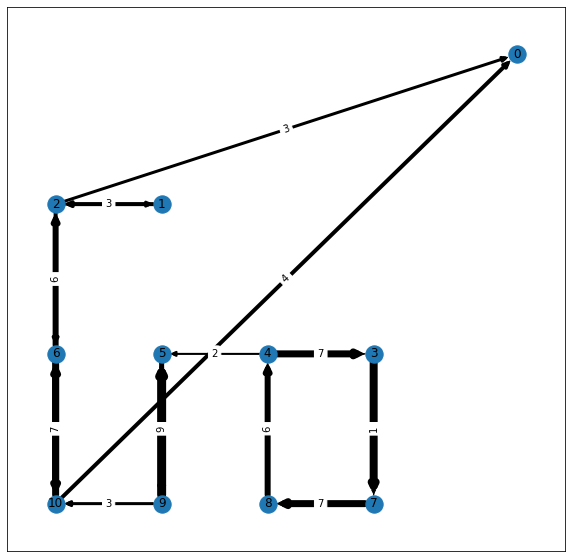

In [33]:
x_prime, s_prime, best = parse_best_bqm(answer,x,s) 

#print(x_prime, s_prime, best)
print(s_prime)
    
#choice = s_prime[0][0]
#choice = s_prime[0][0]
#print(choice, s_prime)

#print("Subtree", N_tree[int(choice)])

final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))

#print(str(final_index // Q))
#print(str(final_index % Q))

for item in x_prime:
    #print(item)
    
    index, level = item
    
    final_G.add_weighted_edges_from([(*edge, level) for edge, label in compelete_label.items() if label == index ])
    


    
matfig = plt.figure(figsize=(10,10)) 
labels = nx.get_edge_attributes(final_G,'weight')
widths = list(nx.get_edge_attributes(final_G,'weight').values())
print("widths",widths)
nx.draw_networkx(final_G, pos)
nx.draw_networkx_edge_labels(final_G,pos,edge_labels = labels)
nx.draw_networkx_edges(final_G,pos,width = widths)

In [65]:
print((cqm.__dict__).keys())
print(list((cqm.__dict__)['_variables']))

dict_keys(['discrete', '_discrete', '_objective', '_variables', '_constraints'])
['s_0', 'x_0_1', 'x_0_2', 'x_0_3', 'x_0_4', 'x_0_5', 'x_0_6', 'x_0_7', 'x_0_8', 'x_0_9', 'x_0_10', 'x_1_1', 'x_1_2', 'x_1_3', 'x_1_4', 'x_1_5', 'x_1_6', 'x_1_7', 'x_1_8', 'x_1_9', 'x_1_10', 'x_2_1', 'x_2_2', 'x_2_3', 'x_2_4', 'x_2_5', 'x_2_6', 'x_2_7', 'x_2_8', 'x_2_9', 'x_2_10', 'x_3_1', 'x_3_2', 'x_3_3', 'x_3_4', 'x_3_5', 'x_3_6', 'x_3_7', 'x_3_8', 'x_3_9', 'x_3_10', 'x_4_1', 'x_4_2', 'x_4_3', 'x_4_4', 'x_4_5', 'x_4_6', 'x_4_7', 'x_4_8', 'x_4_9', 'x_4_10', 'x_5_1', 'x_5_2', 'x_5_3', 'x_5_4', 'x_5_5', 'x_5_6', 'x_5_7', 'x_5_8', 'x_5_9', 'x_5_10', 'x_6_1', 'x_6_2', 'x_6_3', 'x_6_4', 'x_6_5', 'x_6_6', 'x_6_7', 'x_6_8', 'x_6_9', 'x_6_10', 'x_7_1', 'x_7_2', 'x_7_3', 'x_7_4', 'x_7_5', 'x_7_6', 'x_7_7', 'x_7_8', 'x_7_9', 'x_7_10', 'x_8_1', 'x_8_2', 'x_8_3', 'x_8_4', 'x_8_5', 'x_8_6', 'x_8_7', 'x_8_8', 'x_8_9', 'x_8_10', 'x_9_1', 'x_9_2', 'x_9_3', 'x_9_4', 'x_9_5', 'x_9_6', 'x_9_7', 'x_9_8', 'x_9_9', 'x_9_10', '

In [79]:
#QUBO = bqm.to_qubo()
QUBO = bqm.to_numpy_matrix(variable_order = list((cqm.__dict__)['_variables']) )
#print(QUBO)
#print(QUBO_1)

<ipython-input-79-cc77250e2c43>:2: DeprecationWarning: bqm.to_numpy_matrix() is deprecated since dimod 0.10.0
  QUBO = bqm.to_numpy_matrix(variable_order = list((cqm.__dict__)['_variables']) )


In [86]:
# Select a solver
from dwave.system import DWaveSampler, EmbeddingComposite
#sampler = LeapHybridSampler()
sampler = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))

sampleset = sampler.sample_qubo(QUBO)

ValueError: no embedding found

In [87]:

sampler = DWaveSampler(solver={'qpu': True})

sampleset = sampler.sample_qubo(QUBO)

BinaryQuadraticModelStructureError: Problem graph incompatible with solver. Please use 'EmbeddingComposite' to map the problem graph to the solver.

In [88]:
sampler = LeapHybridSampler()
sampleset = sampler.sample_qubo(QUBO)

we choose choice [0. 0. 0. 0. 0. 0. 0. 0. 0.] which subtree # is []
[ 0  1  9 10 11 11 12 13 14 15 15 16 17 18 21 22 23 28 29 30 32 34 34]
[0 3 4 9 2 6 6 0 4 1 7 1 0 2 3 6 9 0 0 5 2 0 6]
widths [1, 10, 7, 4, 7, 1, 5, 8, 2, 1, 3, 4, 7, 10, 1, 1, 6, 3, 5, 7]


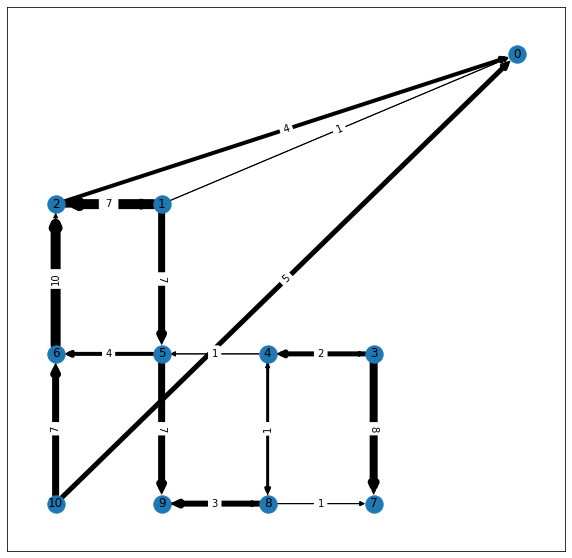

In [89]:
final_index, choice = Q_convert(Q, sampleset, edge_number)

print("we choose choice", choice, "which subtree # is", N_tree[choice==1])

final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))

print(str(final_index // Q))
print(str(final_index % Q))

for value in final_index:
    #print(str(value//Q))
    final_G.add_weighted_edges_from([(*edge, value % Q + 1) for edge, label in compelete_label.items() if label == str(value//Q)])
    
matfig = plt.figure(figsize=(10,10)) 
labels = nx.get_edge_attributes(final_G,'weight')
widths = list(nx.get_edge_attributes(final_G,'weight').values())
print("widths",widths)
nx.draw_networkx(final_G, pos)
nx.draw_networkx_edge_labels(final_G,pos,edge_labels = labels)
nx.draw_networkx_edges(final_G,pos,width = widths)